In [57]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Contruindo Dicionários

Cada dicionário leva o nome de um problema até os resultados computados para o problema, exceto o dicionário opt que leva o nome de um problema até o valor ótimo daquele problema.

In [3]:
def build_optimal_dict(location):
    opt = dict()
    file = open(location,'r')
    line = file.readline()
    #i = 0
    while line!='EOF\n':
        #print(line)
        tokens = line.replace(" ", "").split(":")
        opt[tokens[0]] = int(tokens[1])
        line = file.readline()
        #i+=1
    return opt

In [82]:
opt = build_optimal_dict('opt.txt')
opt

{'a280': 2579,
 'ali535': 202339,
 'att48': 10628,
 'att532': 27686,
 'bayg29': 1610,
 'bays29': 2020,
 'berlin52': 7542,
 'bier127': 118282,
 'brazil58': 25395,
 'brd14051': 469385,
 'brg180': 1950,
 'burma14': 3323,
 'ch130': 6110,
 'ch150': 6528,
 'd198': 15780,
 'd493': 35002,
 'd657': 48912,
 'd1291': 50801,
 'd1655': 62128,
 'd2103': 80450,
 'd15112': 1573084,
 'd18512': 645238,
 'dantzig42': 699,
 'eil51': 426,
 'eil76': 538,
 'eil101': 629,
 'fl417': 11861,
 'fl1400': 20127,
 'fl1577': 22249,
 'fl3795': 28772,
 'fnl4461': 182566,
 'fri26': 937,
 'gil262': 2378,
 'gr17': 2085,
 'gr21': 2707,
 'gr24': 1272,
 'gr48': 5046,
 'gr96': 55209,
 'gr120': 6942,
 'gr137': 69853,
 'gr202': 40160,
 'gr229': 134602,
 'gr431': 171414,
 'gr666': 294358,
 'hk48': 11461,
 'kroA100': 21282,
 'kroB100': 22141,
 'kroC100': 20749,
 'kroD100': 21294,
 'kroE100': 22068,
 'kroA150': 26524,
 'kroB150': 26130,
 'kroA200': 29368,
 'kroB200': 29437,
 'lin105': 14379,
 'lin318': 42029,
 'linhp318': 41345,
 

In [8]:
d = 'results'

def result_checking(directory):
    lp = []
    twice_dict = dict()
    christ_dict = dict()
    bb_dict = dict()
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        # checking if it is a file
        if os.path.isfile(f):
            problem = f[8:-8]
            lp.append(problem)
            file = open(directory+"/"+problem+"_log.txt",'r')  
            line = file.readline()
            if not line=='':
                twice_dict[problem] = line.split("\\")
            line = file.readline()
            if not line=='':
                christ_dict[problem] = line.split("\\")
            line = file.readline()
            if not line=='':
                bb_dict[problem] = line.split("\\")
    return twice_dict, christ_dict, bb_dict
    



In [24]:
t,c,b = result_checking(d)


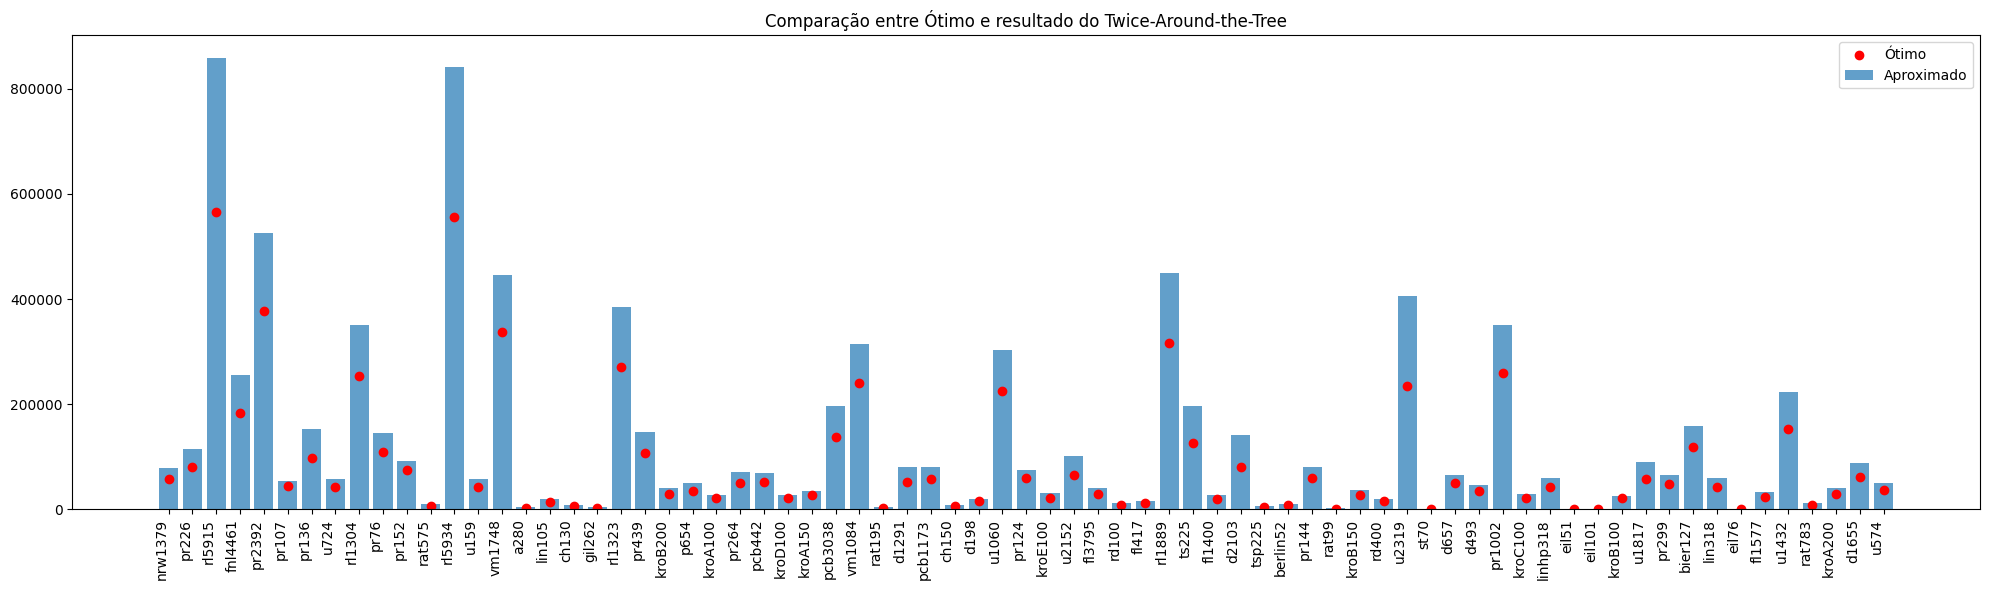

1.3913441459839382

In [77]:
#Análise Twice-Aroud
aprox = []
otimo = []
p = []
for k in t.keys():
    a = float(t[k][1])
    o = opt[k]
    p.append(a/o)
    aprox.append(a)
    otimo.append(o)
pos = np.arange(len(t.keys()))
plt.figure(figsize=(20, 6))
plt.bar(pos, aprox, align='center', alpha=0.7, label='Aproximado')
plt.scatter(pos, otimo, color='red', marker='o', label='Ótimo')
plt.xticks(pos, list(t.keys()), rotation=90, ha='right')
plt.title('Comparação entre Ótimo e resultado do Twice-Around-the-Tree')
plt.tight_layout()
plt.legend()
plt.show()
pm = np.mean(np.array(p))
pm


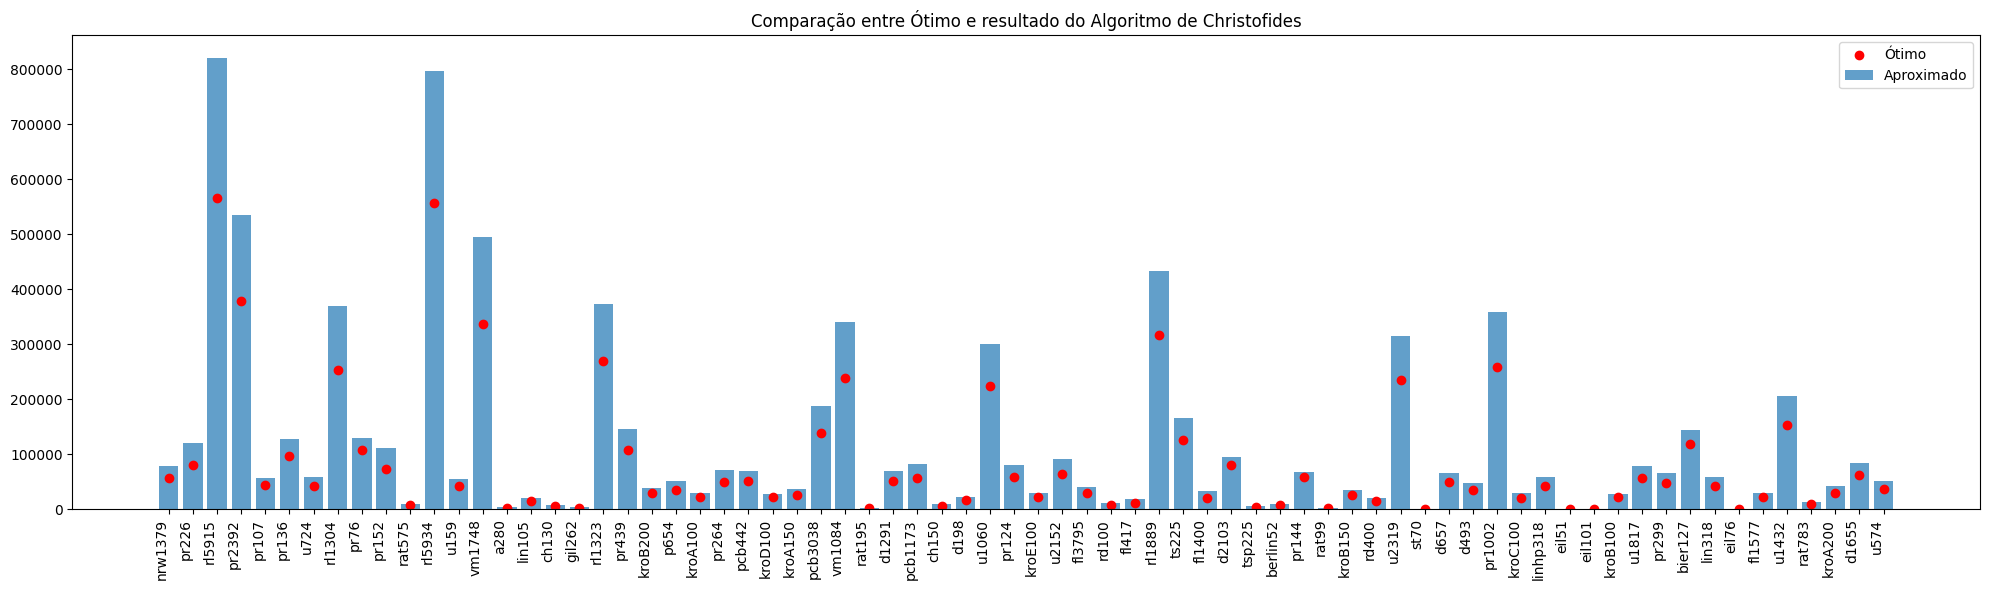

1.369239720909113

In [78]:
#Análise Christofides
aprox = []
otimo = []
p = []
for k in c.keys():
    a = float(c[k][1])
    o = opt[k]
    p.append(a/o)
    aprox.append(a)
    otimo.append(o)

pos = np.arange(len(c.keys()))
plt.figure(figsize=(20, 6))
plt.bar(pos, aprox, align='center', alpha=0.7, label='Aproximado')
plt.scatter(pos, otimo, color='red', marker='o', label='Ótimo')
plt.xticks(pos, list(c.keys()), rotation=90, ha='right')
plt.title('Comparação entre Ótimo e resultado do Algoritmo de Christofides')
plt.tight_layout()
plt.legend()
plt.show()
pm = np.mean(np.array(p))
pm


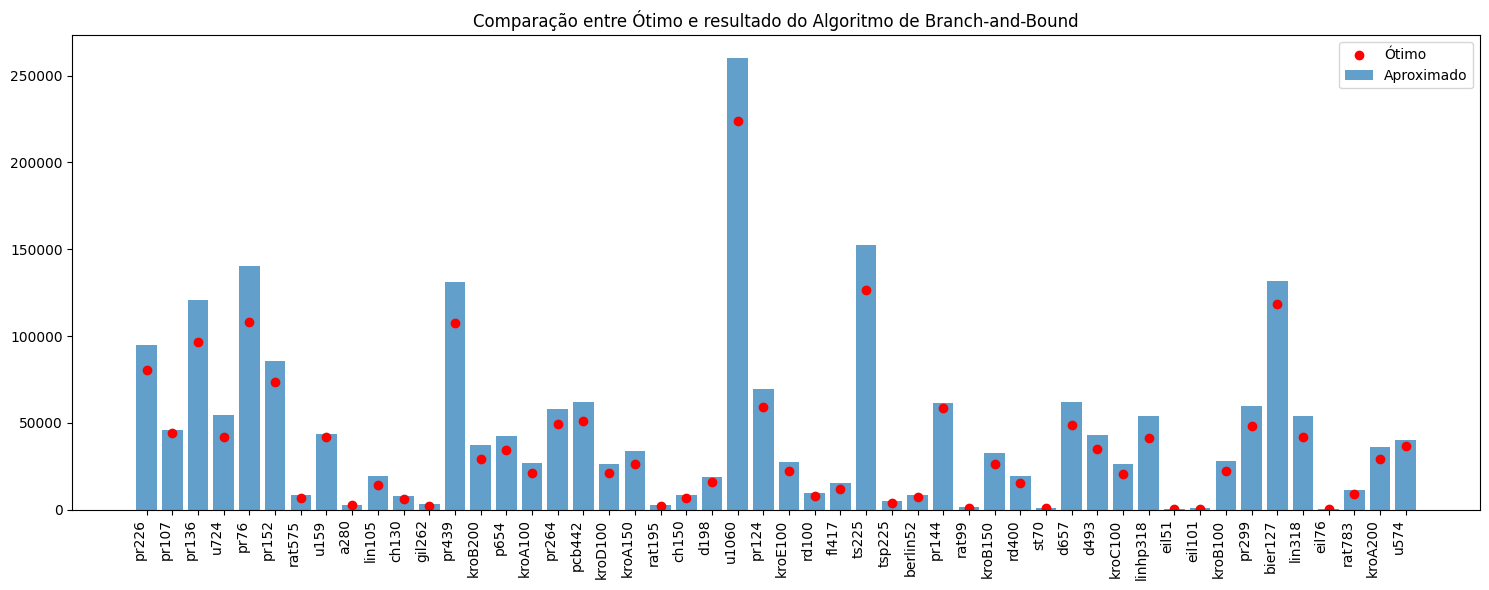

1.2127426940335475

In [80]:
#Análise BB
aproxb = []
otimo = []
p = []
for k in b.keys():
    a = float(b[k][3])
    o = opt[k]
    p.append(a/o)
    aproxb.append(a)
    otimo.append(o)
    if abs(a-o)<=0.0001:
        print(k)

pos = np.arange(len(b.keys()))
plt.figure(figsize=(15, 6))
plt.bar(pos, aproxb, align='center', alpha=0.7, label='Aproximado')
plt.scatter(pos, otimo, color='red', marker='o', label='Ótimo')
plt.xticks(pos, list(b.keys()), rotation=90, ha='right')
plt.title('Comparação entre Ótimo e resultado do Algoritmo de Branch-and-Bound')
plt.tight_layout()
plt.legend()
plt.show()
pm = np.mean(np.array(p))
pm

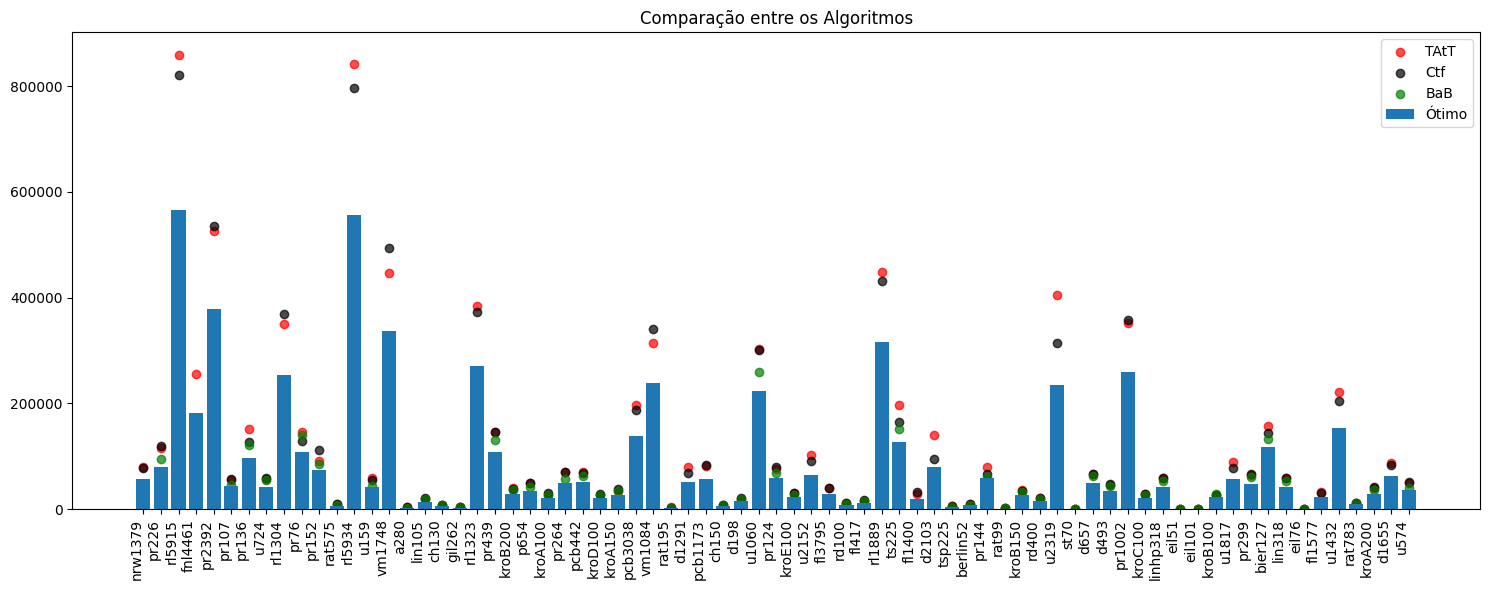

In [91]:
#Análise comparada
aproxb = []
aproxt = []
aproxc = []
otimo = []
for k in t.keys():
    o = opt[k]
    aproxt.append(float(t[k][1]))
    otimo.append(o)
    if k in c.keys():
        aproxc.append(float(c[k][1]))
    else:
        aproxc.append(np.nan)
    if k in b.keys():
        aproxb.append(float(b[k][3]))
    else:
        aproxb.append(np.nan)
pos = np.arange(len(t.keys()))
plt.figure(figsize=(15, 6))
plt.scatter(pos, aproxt, color='red', alpha=0.7, label='TAtT')
plt.scatter(pos, aproxc, color='black', alpha=0.7, label='Ctf')
plt.scatter(pos, aproxb, color='green', alpha=0.7, label='BaB')
plt.bar(pos, otimo, align='center', label='Ótimo')
plt.xticks(pos, list(t.keys()), rotation=90, ha='right')
plt.title('Comparação entre os Algoritmos')
plt.tight_layout()
plt.legend()
plt.show()


# Criando a tabela de gasto de memória

In [45]:
problemas = []
tamanhos = []
file = open("p.txt",'r')  
line = file.readline()
while line!='EOF':
    tokens = line.split()
    problemas.append(tokens[0])
    tamanhos.append(int(tokens[1]))
    line = file.readline()

In [74]:
prob = np.array(problemas)
sizes = np.array(tamanhos)
tl = list(t.keys())
cl = list(c.keys())
bl = list(b.keys())
tm = []
cm = []
bm = []
for i in range(78):
    if prob[i] in t.keys():
        tm.append(int(t[prob[i]][2]))
    else:
        tm.append(0)
    
    if prob[i] in c.keys():
        cm.append(int(c[prob[i]][2]))
    else:
        cm.append(0)

    if prob[i] in b.keys():
        bm.append(int(1+sizes[i]*(sizes[i]-1)))
    else:
        bm.append(0)


In [75]:
dados = {
    'Problema': prob,
    'Tamanho': sizes,
    'Memória TAtT': tm,
    'Memória Ctf': cm,
    'Memória BaB': bm
}
tabela = pd.DataFrame(dados)
tabela.head()

,Problema,Tamanho,Memória TAtT,Memória Ctf,Memória BaB
0,eil51,51,101,214,2551
1,berlin52,52,103,217,2653
2,st70,70,139,295,4831
3,eil76,76,151,322,5701
4,pr76,76,151,315,5701


In [76]:
with open('tabela.tex', 'w') as f:
    f.write(tabela.to_latex(index=False))